In [1]:
# Run the notebook as if it's in the PROJECT directory
%bookmark PROJ_ROOT /reg/data/ana03/scratch/cwang31/pf
%cd -b PROJ_ROOT

(bookmark:PROJ_ROOT) -> /reg/data/ana03/scratch/cwang31/pf
/reg/data/ana03/scratch/cwang31/pf


In [2]:
# Load paths for using psana
%env SIT_ROOT=/reg/g/psdm/
%env SIT_DATA=/cds/group/psdm/data/
%env SIT_PSDM_DATA=/cds/data/psdm/

env: SIT_ROOT=/reg/g/psdm/
env: SIT_DATA=/cds/group/psdm/data/
env: SIT_PSDM_DATA=/cds/data/psdm/


In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors       as mcolors
import matplotlib.patches      as mpatches
import matplotlib.transforms   as mtransforms
%matplotlib inline

In [4]:
import h5py
import os
import numpy as np

In [5]:
from peaknet.datasets.utils import PsanaImg

In [8]:
path_cxi = "/reg/data/ana03/scratch/cwang31/pf/mfxp22820/cwang31/psocake/r0014/event_14.cxi"

In [9]:
with h5py.File(path_cxi, 'r') as fh:
    x_list = fh.get("entry_1/result_1/peakXPosRaw")[0]
    y_list = fh.get("entry_1/result_1/peakYPosRaw")[0]

In [10]:
x_list

array([1359.,  771., 1005., ...,    0.,    0.,    0.], dtype=float32)

## Load psana for accessing image data

In [11]:
# Sample Rayonix dataset
exp           = 'mfxp22820'
run           = 14
img_load_mode = 'calib'
access_mode   = 'idx'
detector_name = 'Rayonix'

psana_img = PsanaImg(exp, run, access_mode, detector_name)

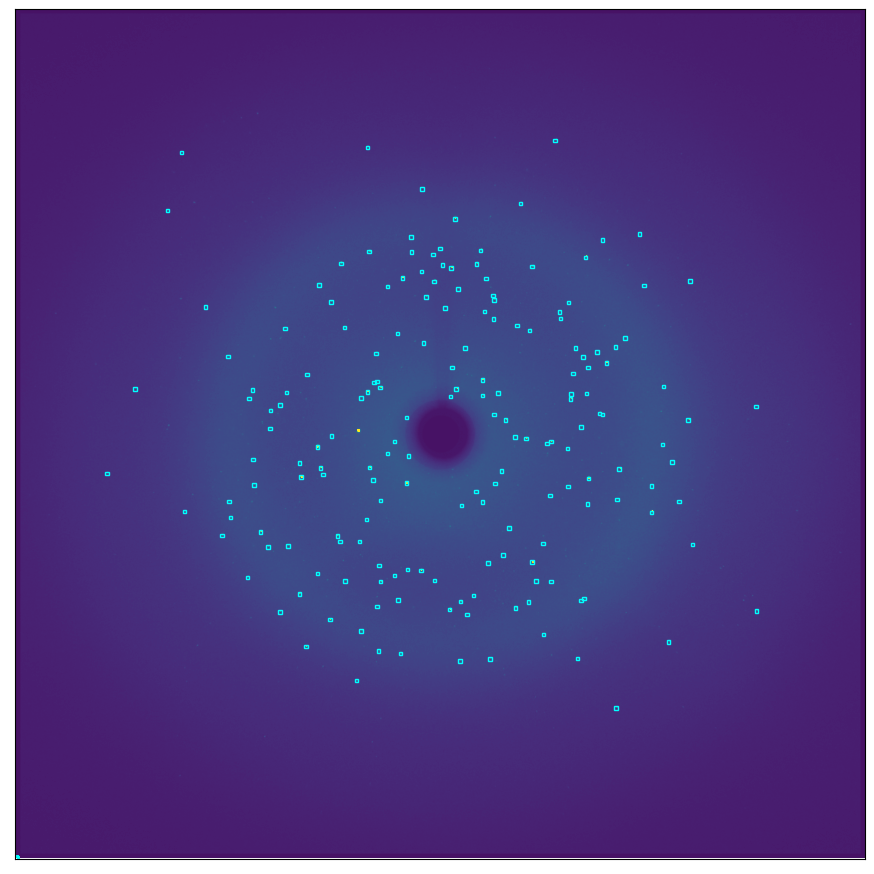

In [12]:
saves_plot = True

# Load images by event...
event = 14
img   = psana_img.get(event, None, 'calib')

mask = np.zeros_like(img)
offset = 10
size_y, size_x = img.shape
xmin = 0 + offset
xmax = size_x - offset
ymin = 0 + offset
ymax = size_y - offset
mask[ymin:ymax, xmin:xmax] = 1.0
img *= mask


# [[[ Visual ]]]
# Set up the visual
ncols = 1
nrows = 1
# fig   = plt.figure(figsize = (16*5,14*5))
fig   = plt.figure(figsize = (8.5,8.5))
gspec = fig.add_gridspec( nrows, ncols,
                          width_ratios  = [1],
                          height_ratios = [1,], 
                        )
ax_list = [ fig.add_subplot(gspec[0, 0], aspect = 1), ]

# Plot image
data = img
vmin = np.mean(data) - 1 * data.std()
vmax = np.mean(data) + 6 * data.std()
im = ax_list[0].imshow(data, vmin = vmin, vmax = vmax)

ax_list[0].set_xticks([])
ax_list[0].set_yticks([])

# Place a box on a peak
offset = 4
b_offset = 2
for y, x in zip(y_list, x_list):
    x_bottom_left = x - offset
    y_bottom_left = y - offset

    rec_obj = mpatches.Rectangle((x_bottom_left, y_bottom_left), 
                                 2 * offset, 2 * offset, 
                                 linewidth = 1.0, 
                                 edgecolor = 'cyan', 
                                 facecolor='none')
    ax_list[0].add_patch(rec_obj)

    y_bmin, x_bmin = 0, 0
    y_bmax, x_bmax = size_y, size_x
    ax_list[0].set_xlim([x_bmin - b_offset, x_bmax + b_offset])
    ax_list[0].set_ylim([y_bmin - b_offset, y_bmax + b_offset])


if saves_plot:
    drc_pdf  = "figures.paper"
    fl_pdf   = f"psocake.{exp}.run{run}.event{event}.pdf"
    path_pdf = os.path.join(drc_pdf, fl_pdf)
    fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.1, hspace=0)
    fig.savefig(path_pdf, dpi = 300)

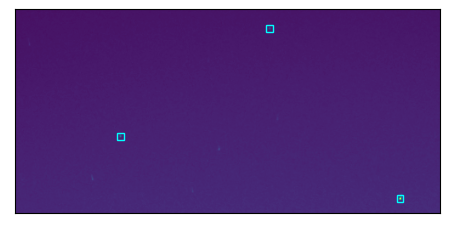

In [17]:
saves_plot = True

# Load images by event...
event = 14
img   = psana_img.get(event, None, 'calib')

mask = np.zeros_like(img)
offset = 10
size_y, size_x = img.shape
xmin = 0 + offset
xmax = size_x - offset
ymin = 0 + offset
ymax = size_y - offset
mask[ymin:ymax, xmin:xmax] = 1.0
img *= mask


# [[[ Visual ]]]
# Set up the visual
ncols = 1
nrows = 1
# fig   = plt.figure(figsize = (16*5,14*5))
fig   = plt.figure(figsize = (4.25,2.04))
gspec = fig.add_gridspec( nrows, ncols,
                          width_ratios  = [1],
                          height_ratios = [1,], 
                        )
ax_list = [ fig.add_subplot(gspec[0, 0], aspect = 1), ]

# Plot image
data = img
vmin = np.mean(data) - 1 * data.std()
vmax = np.mean(data) + 6 * data.std()
im = ax_list[0].imshow(data, vmin = vmin, vmax = vmax)

ax_list[0].set_xticks([])
ax_list[0].set_yticks([])

cy, cx = 1714+50, 830
win_y = 120
win_x = 250
size_y, size_x = img.shape[-2:]
xmin = cx - win_x
xmax = cx + win_x
ymin = cy - win_y
ymax = cy + win_y
ax_list[0].set_xlim([xmin, xmax])
ax_list[0].set_ylim([ymin, ymax])

# Place a box on a peak
offset = 4
b_offset = 2
for y, x in zip(y_list, x_list):
    x_bottom_left = x - offset
    y_bottom_left = y - offset

    rec_obj = mpatches.Rectangle((x_bottom_left, y_bottom_left), 
                                 2 * offset, 2 * offset, 
                                 linewidth = 1.0, 
                                 edgecolor = 'cyan', 
                                 facecolor='none')
    ax_list[0].add_patch(rec_obj)

    y_bmin, x_bmin = 0, 0
    y_bmax, x_bmax = size_y, size_x
    # ax_list[0].set_xlim([x_bmin - b_offset, x_bmax + b_offset])
    # ax_list[0].set_ylim([y_bmin - b_offset, y_bmax + b_offset])


if saves_plot:
    drc_pdf  = "figures.paper"
    fl_pdf   = f"psocake.{exp}.run{run}.event{event}.top.pdf"
    path_pdf = os.path.join(drc_pdf, fl_pdf)
    fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.1, hspace=0)
    fig.savefig(path_pdf, dpi = 300)

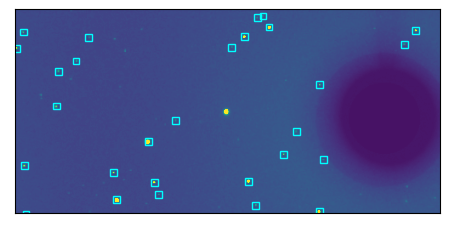

In [13]:
saves_plot = True

# Load images by event...
event = 14
img   = psana_img.get(event, None, 'calib')

mask = np.zeros_like(img)
offset = 10
size_y, size_x = img.shape
xmin = 0 + offset
xmax = size_x - offset
ymin = 0 + offset
ymax = size_y - offset
mask[ymin:ymax, xmin:xmax] = 1.0
img *= mask


# [[[ Visual ]]]
# Set up the visual
ncols = 1
nrows = 1
# fig   = plt.figure(figsize = (16*5,14*5))
fig   = plt.figure(figsize = (4.25,2.04))
gspec = fig.add_gridspec( nrows, ncols,
                          width_ratios  = [1],
                          height_ratios = [1,], 
                        )
ax_list = [ fig.add_subplot(gspec[0, 0], aspect = 1), ]

# Plot image
data = img
vmin = np.mean(data) - 1 * data.std()
vmax = np.mean(data) + 6 * data.std()
im = ax_list[0].imshow(data, vmin = vmin, vmax = vmax)

ax_list[0].set_xticks([])
ax_list[0].set_yticks([])

cy, cx = 967, 776
win_y = 120
win_x = 250
size_y, size_x = img.shape[-2:]
xmin = cx - win_x
xmax = cx + win_x
ymin = cy - win_y
ymax = cy + win_y
ax_list[0].set_xlim([xmin, xmax])
ax_list[0].set_ylim([ymin, ymax])

# Place a box on a peak
offset = 4
b_offset = 2
for y, x in zip(y_list, x_list):
    x_bottom_left = x - offset
    y_bottom_left = y - offset

    rec_obj = mpatches.Rectangle((x_bottom_left, y_bottom_left), 
                                 2 * offset, 2 * offset, 
                                 linewidth = 1.0, 
                                 edgecolor = 'cyan', 
                                 facecolor='none')
    ax_list[0].add_patch(rec_obj)

    y_bmin, x_bmin = 0, 0
    y_bmax, x_bmax = size_y, size_x
    # ax_list[0].set_xlim([x_bmin - b_offset, x_bmax + b_offset])
    # ax_list[0].set_ylim([y_bmin - b_offset, y_bmax + b_offset])


if saves_plot:
    drc_pdf  = "figures.paper"
    fl_pdf   = f"psocake.{exp}.run{run}.event{event}.size.pdf"
    path_pdf = os.path.join(drc_pdf, fl_pdf)
    fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.1, hspace=0)
    fig.savefig(path_pdf, dpi = 300)